In [1]:
import sys
# # # INSERT YOUR PATH THE THE /FDCAnalysis FOLDER HERE # # #
sys.path.append('/Users/danhardy/OneDrive - University of Bristol/BARC Desktop/Python Porjects/FDC data processing/FDCAnalysis')
import FDCA


In [2]:
dryfilelocation, drymultifilelocation = FDCA.get_file_locations('SampleData00pctRH')

Found results file:  2021-11-10-Wed_1_Results.txt
	 at:  SampleData00pctRH/2021-11-10-Wed_1_Results.txt 

Found multiple exposure file:  2021-11-10-Wed_Multiple exposures - 2 exposures at 5000 us separation.txt
	 at:  SampleData00pctRH/2021-11-10-Wed_Multiple exposures - 2 exposures at 5000 us separation.txt 



In [3]:
humidfilelocation, humidmultifilelocation = FDCA.get_file_locations('SampleData40pctRH')

Found results file:  2021-11-11-Thu_5_Results.txt
	 at:  SampleData40pctRH/2021-11-11-Thu_5_Results.txt 

Found multiple exposure file:  2021-11-11-Thu_Multiple exposures - 2 exposures at 5000 us separation.txt
	 at:  SampleData40pctRH/Multiple exposures/2021-11-11-Thu_Multiple exposures - 2 exposures at 5000 us separation.txt 



In [4]:
solution_density = 1005

Experimental Conditions:


Temperature average, std. dev., min, max, gradient 
 22.512221700374518 0.09891199728181568 22.395815 22.737732 0.11397233333333408

RH average, std. dev., min, max, gradient 
 2.032552147565537 0.18747993404934593 1.698319 2.627116 0.309599


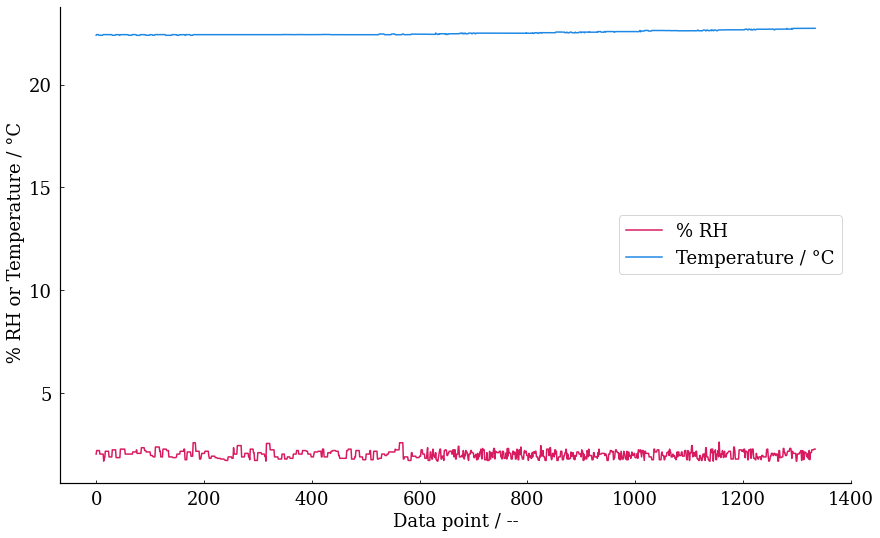

/Users/danhardy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Correcting gas flow, 1 - density_check_value = 0.999 Corrected gas flow = 25.567 test 1005.86633

/Users/danhardy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


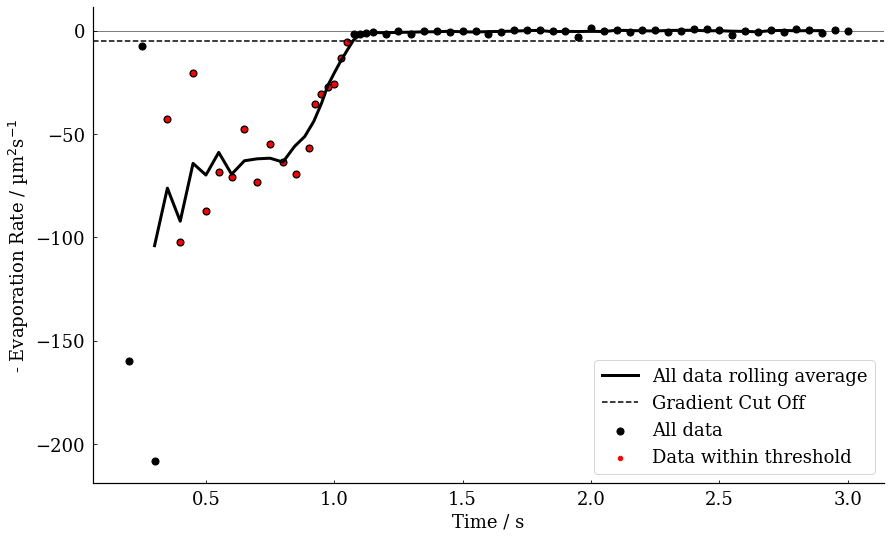

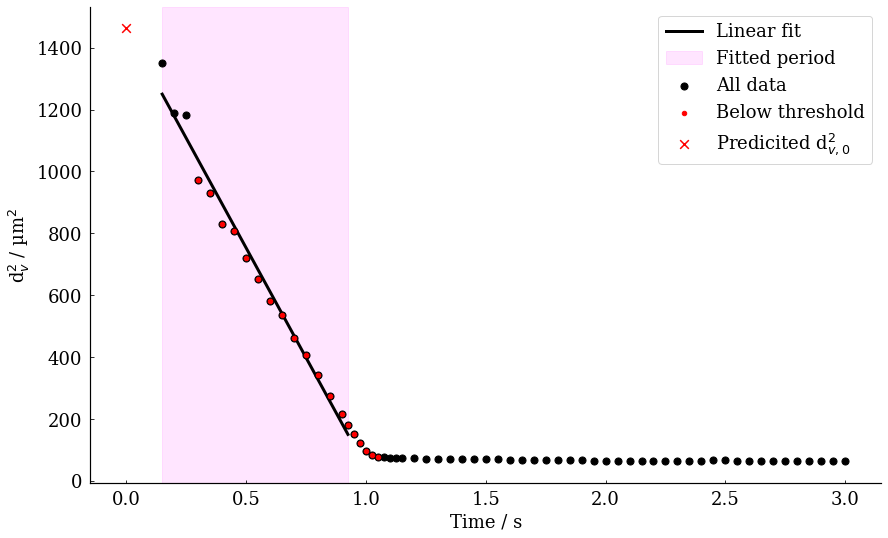

Fitted intial size / µm			38.242
Calculated eavporation rate / µm^2/s	1418.693
R squared				0.985


In [5]:
dry_output_parameters, dry_results = FDCA.run_all_analysis(dryfilelocation, 1, 500, solution_density)

Experimental Conditions:


Temperature average, std. dev., min, max, gradient 
 23.888538332647098 0.08062867899171779 23.794985 24.099342 0.10145233333333319

RH average, std. dev., min, max, gradient 
 40.514291624117504 0.18466448124718277 40.088583 41.120579 0.3439986666666665


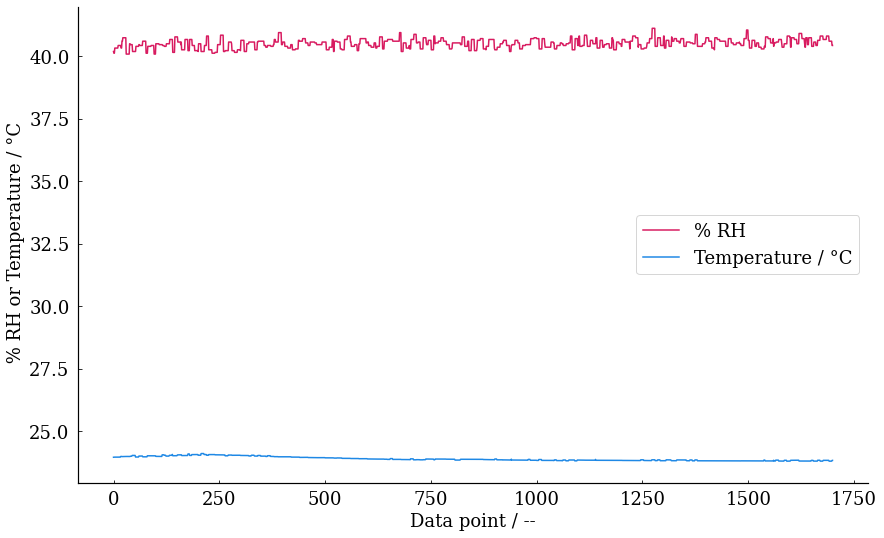

/Users/danhardy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Correcting gas flow, 1 - density_check_value = 0.999 Corrected gas flow = 77.05 test 1005.614444

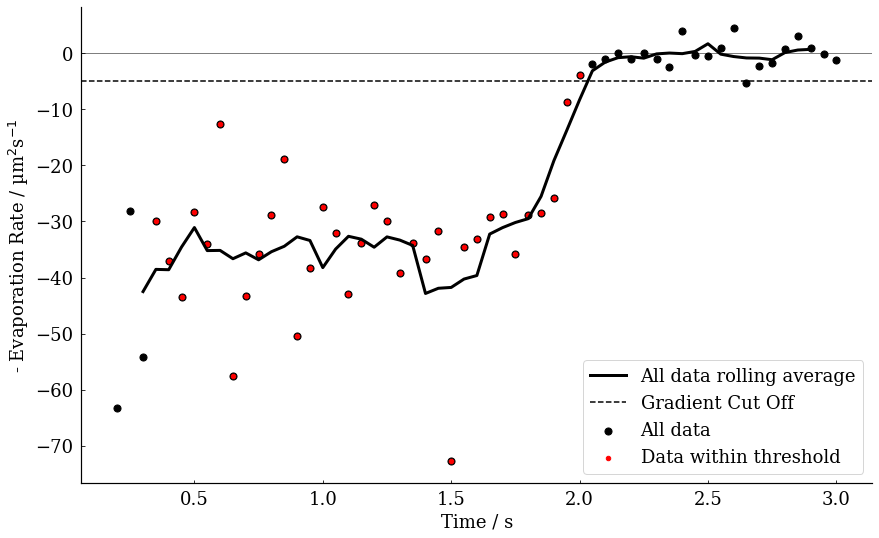

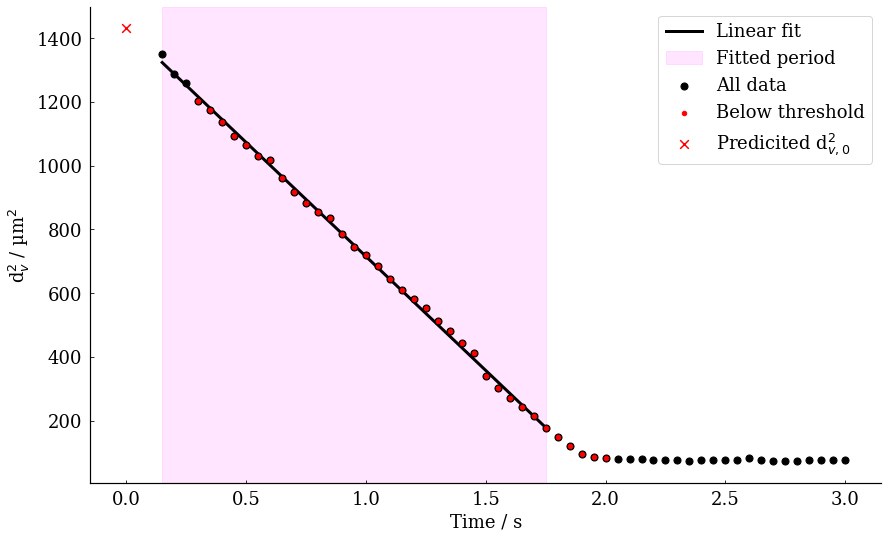

Fitted intial size / µm			37.829
Calculated eavporation rate / µm^2/s	715.608
R squared				0.999


In [6]:
humid_output_parameters, humid_results = FDCA.run_all_analysis(humidfilelocation, 1, 500, solution_density)

In [7]:
dry_ME_results = FDCA.get_multiple_exposure_data(drymultifilelocation,
                                                 dry_output_parameters['CalculatedGasFlow'])


In [8]:
humid_ME_results = FDCA.get_multiple_exposure_data(humidmultifilelocation,
                                                   humid_output_parameters['CalculatedGasFlow'])


In [9]:

dry_output_parameters

{'SampleDensity': 1005,
 'NominalGasFlow': 500,
 'CalculatedGasFlow': 25.566762890465906,
 'Thresholds': {'stokes': 0.1, 'reynolds': 3, 'acceleration': 100},
 'LinearFit': {'intercept': 1462.4630600482133,
  'gradient': -1418.693473369749,
  'r_sq': 0.9850330469455295,
  't_min': 0.15,
  't_max': 0.925},
 'RelaxationFits': <function FDCA.relaxation_fit(time_data, speed_data, relaxation_initial_guess=[100, 0.005, -10])>}

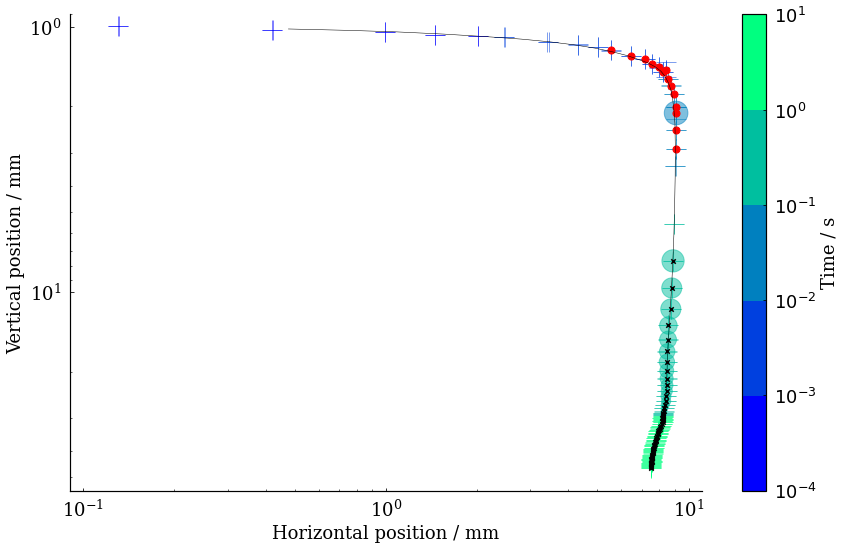

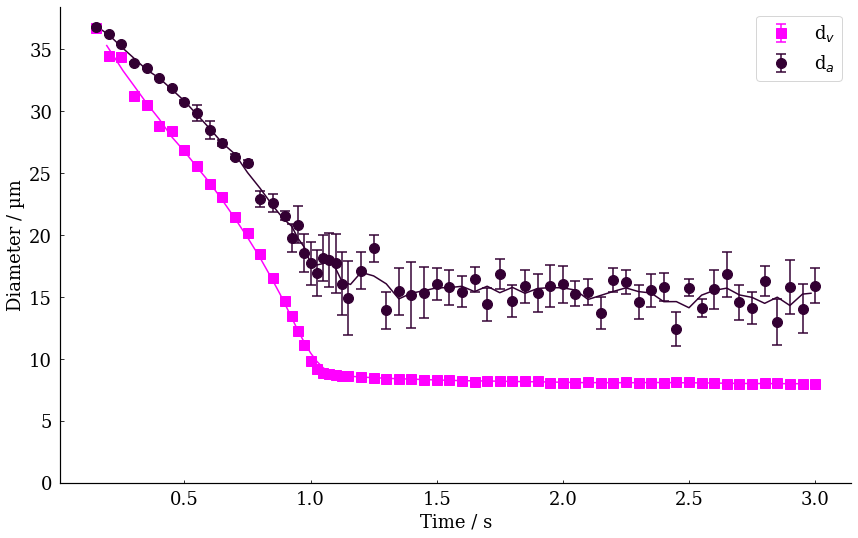

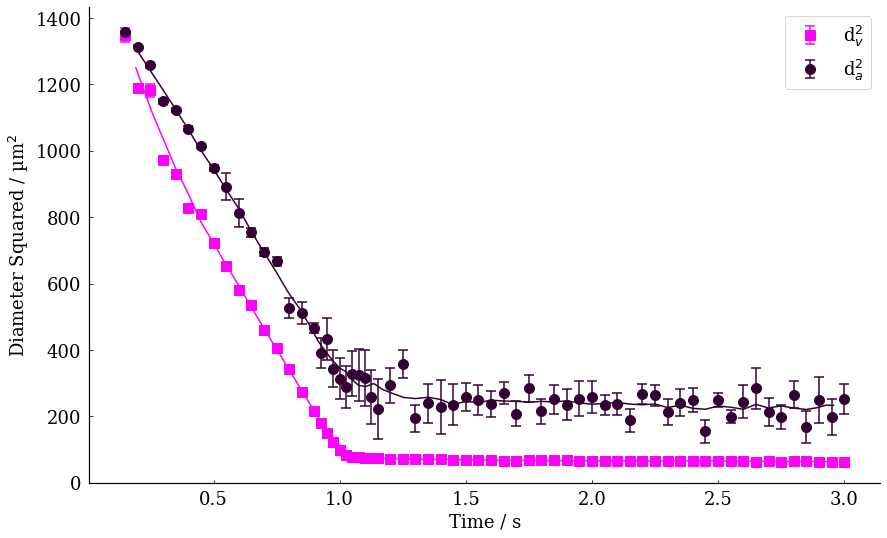

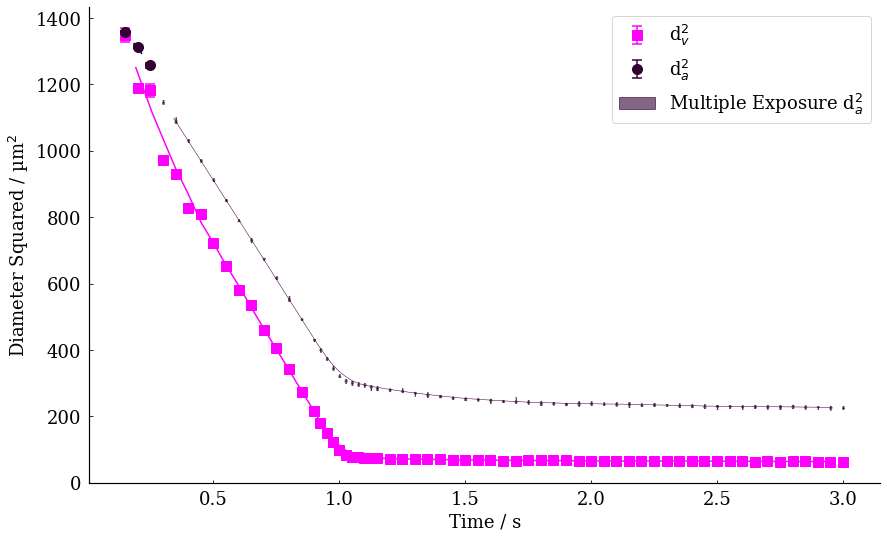

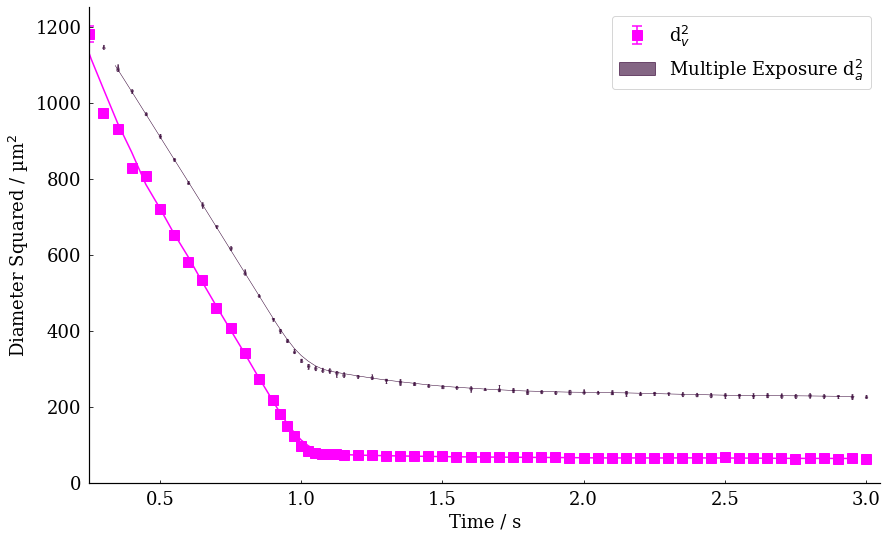

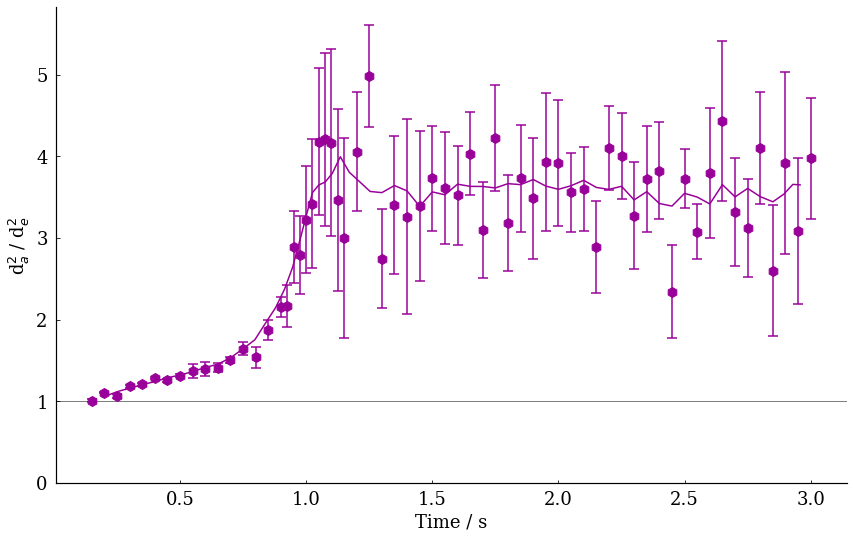

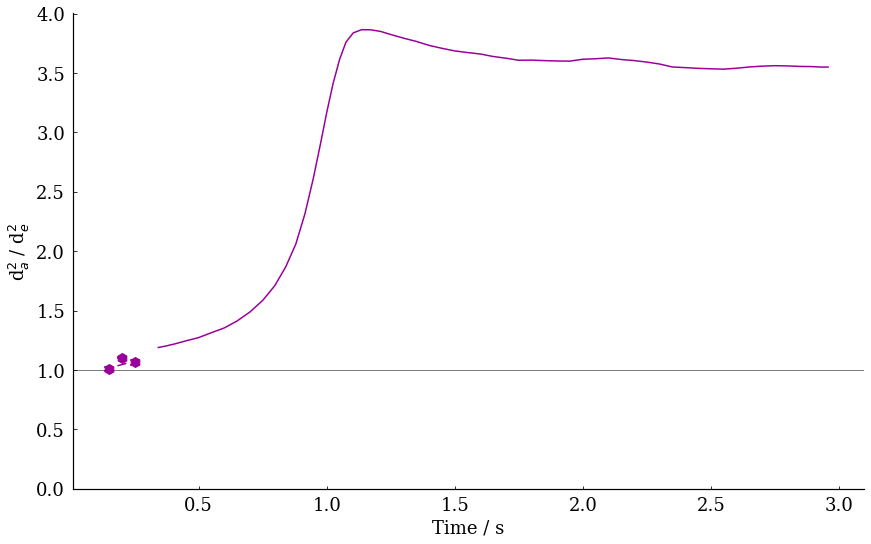

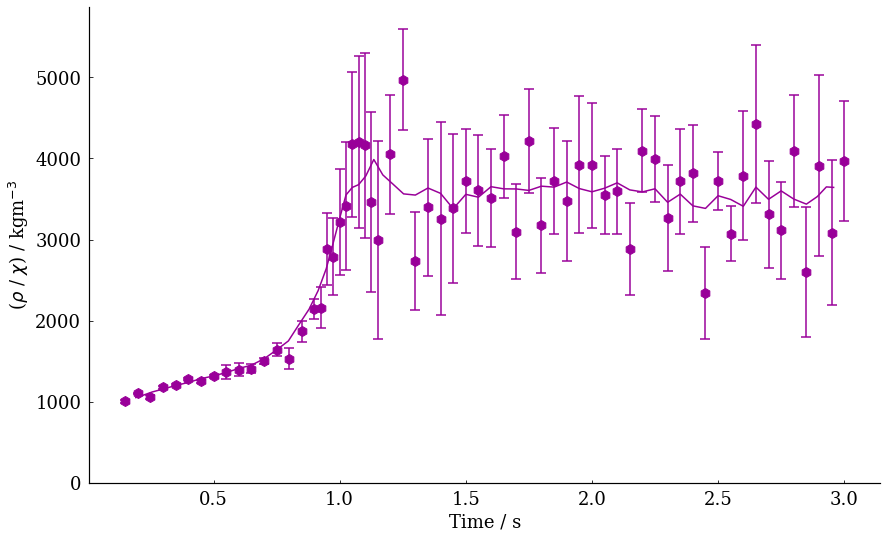

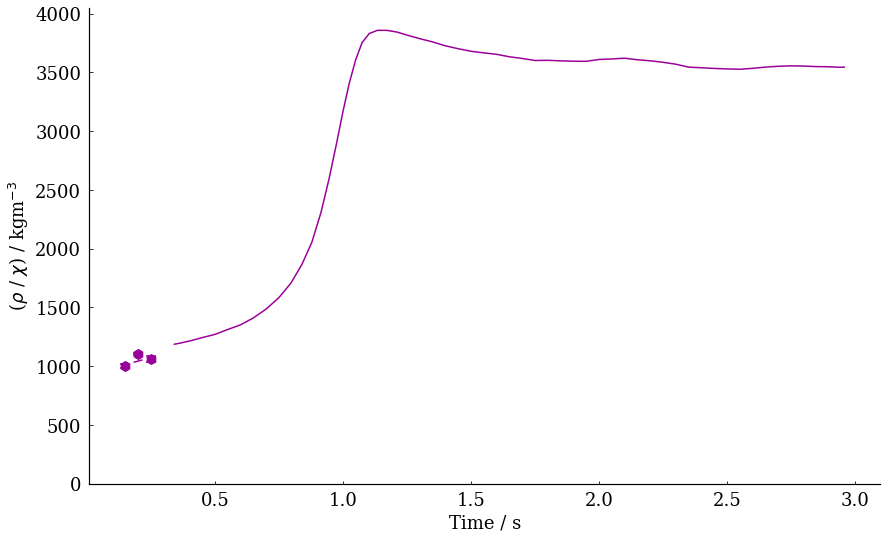

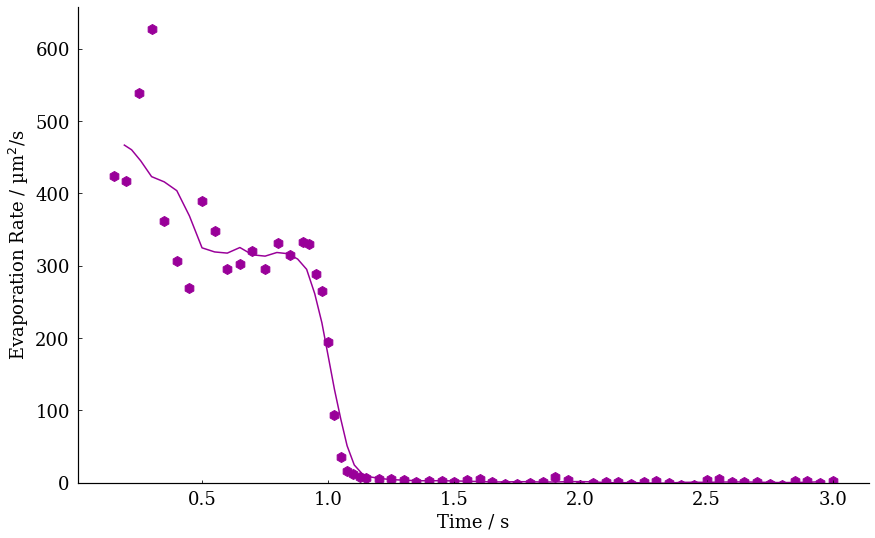

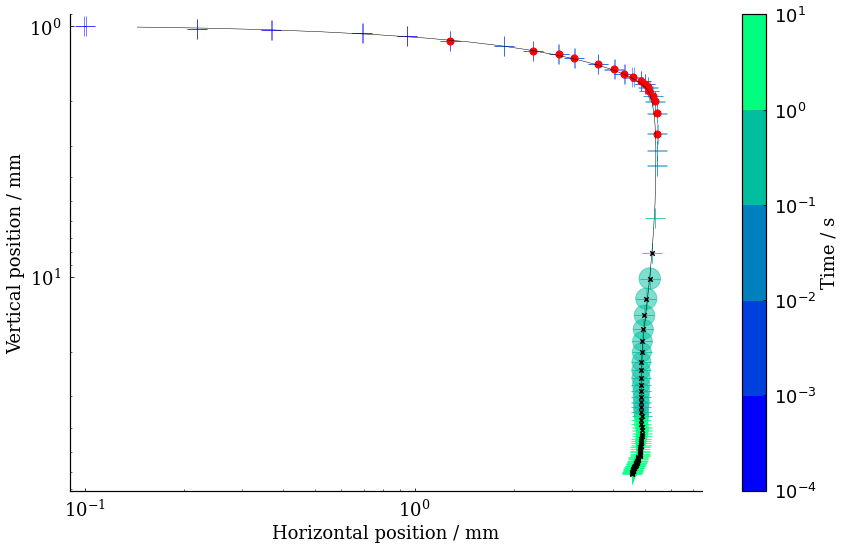

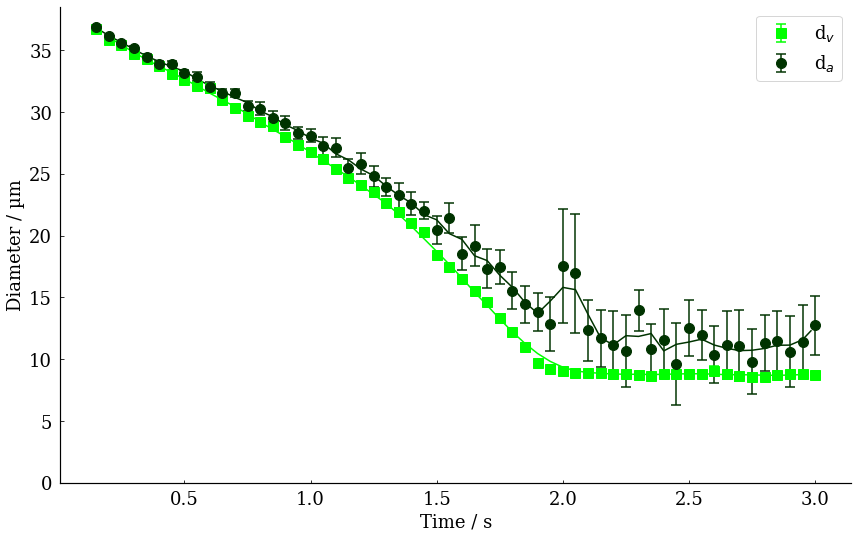

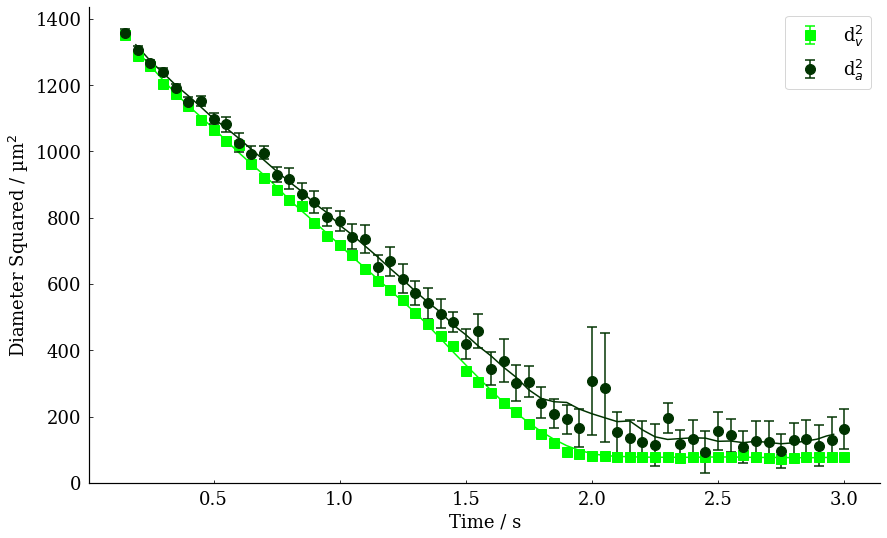

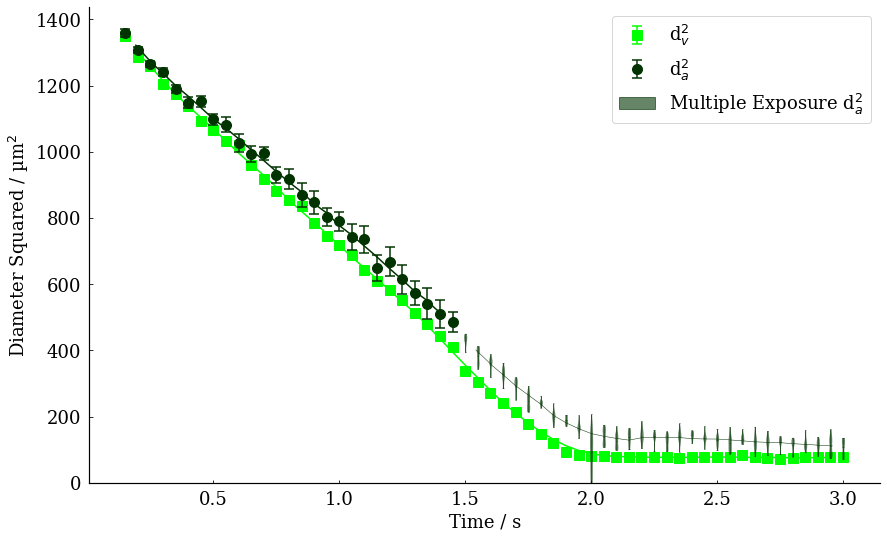

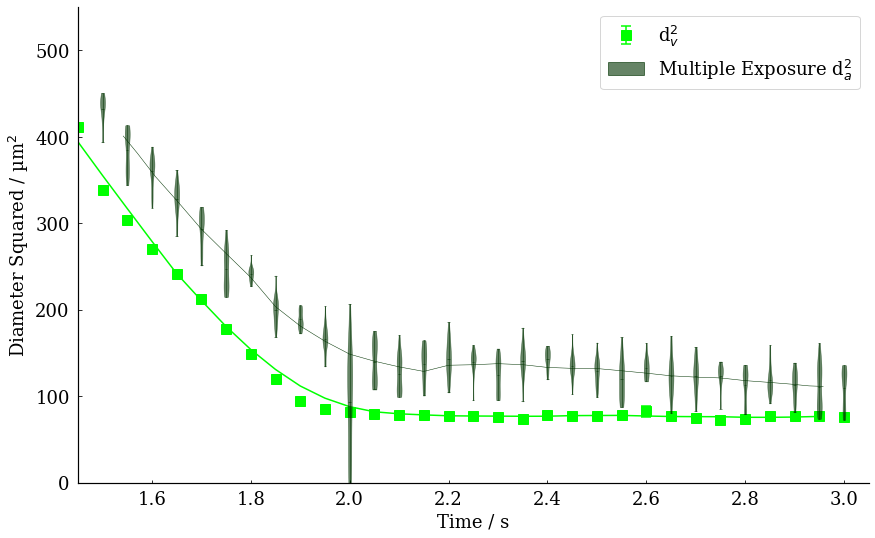

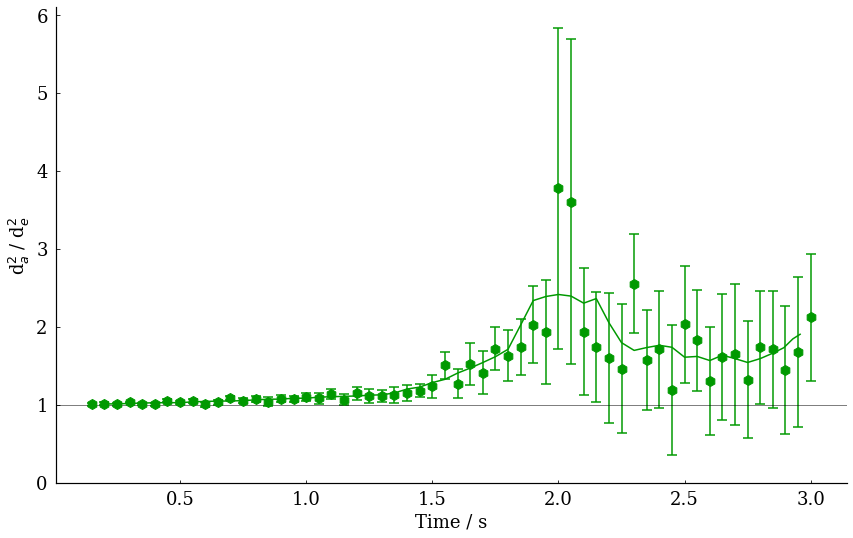

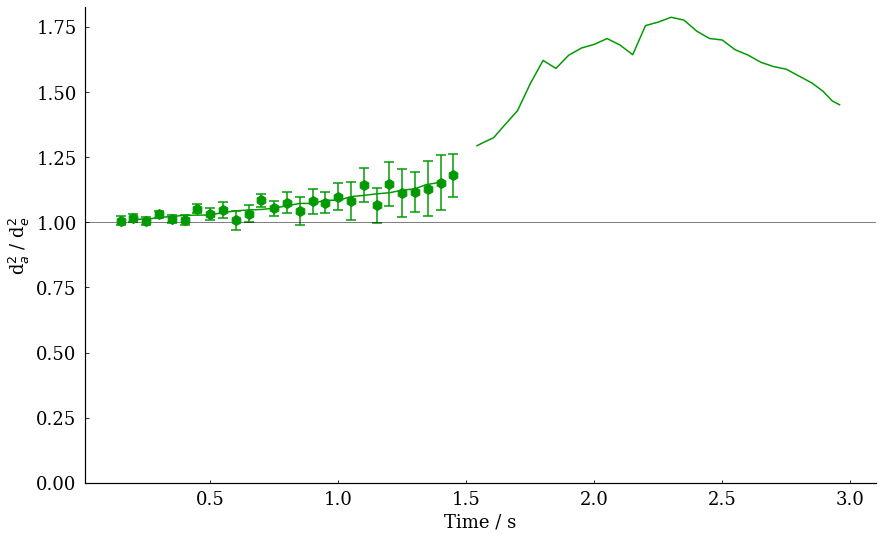

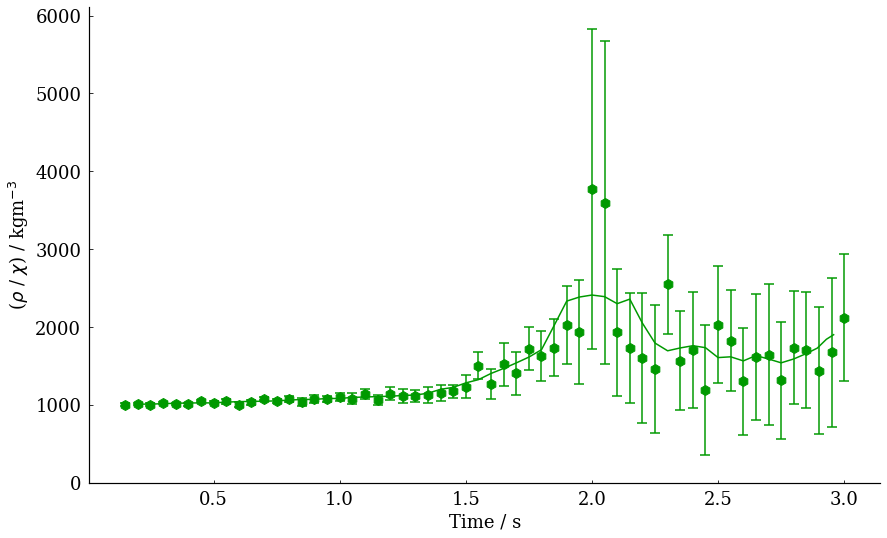

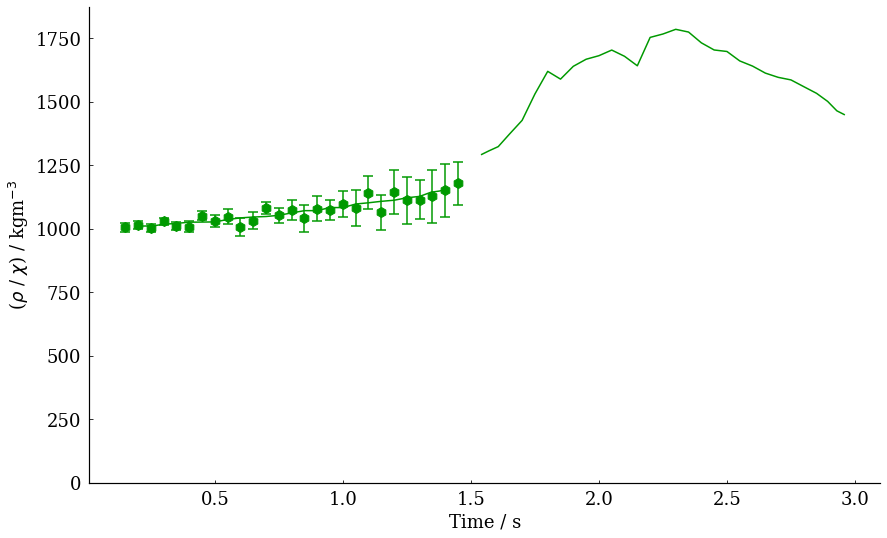

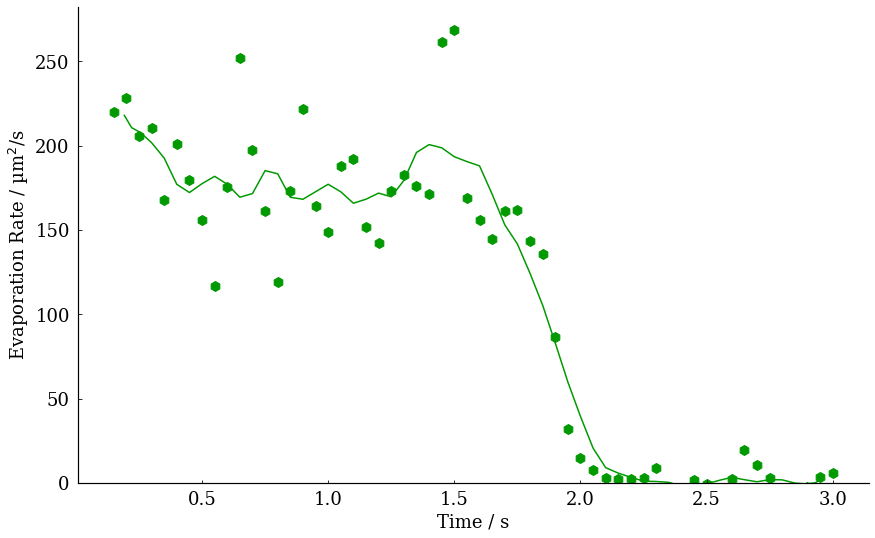

In [10]:
FDCA.generate_plots(dry_results,
                    dry_output_parameters,
                    colour = 'magenta',
                    multi_exposure_dict=dry_ME_results,
                    rolling_window=7)

FDCA.generate_plots(humid_results,
                    humid_output_parameters,
                    colour = 'lime',
                    multi_exposure_dict=humid_ME_results,
                    rolling_window=7)

In [11]:
dry_output_parameters['LinearFit']['intercept'] ** 0.5

38.2421633808577

In [12]:
rh_list = [0,
           40]

results_list = [dry_results,
                humid_results]

multi_list = [dry_ME_results,
              humid_ME_results]


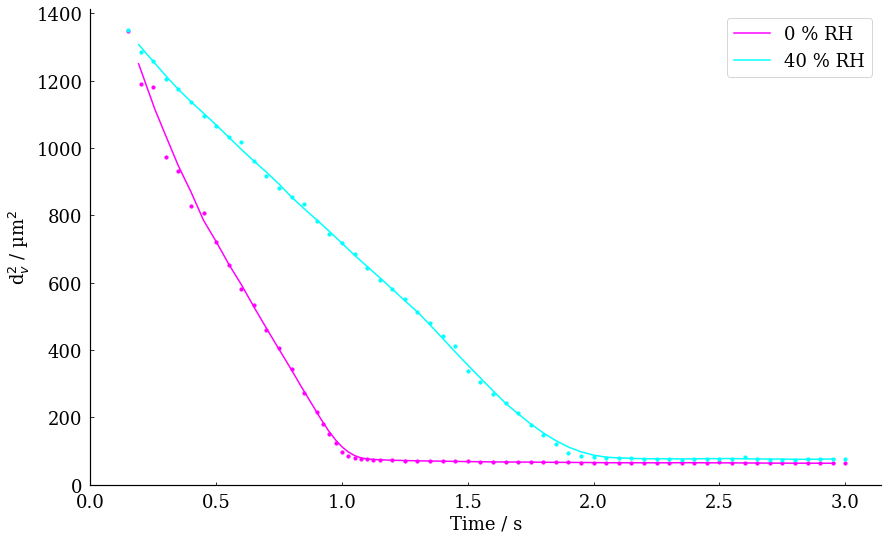

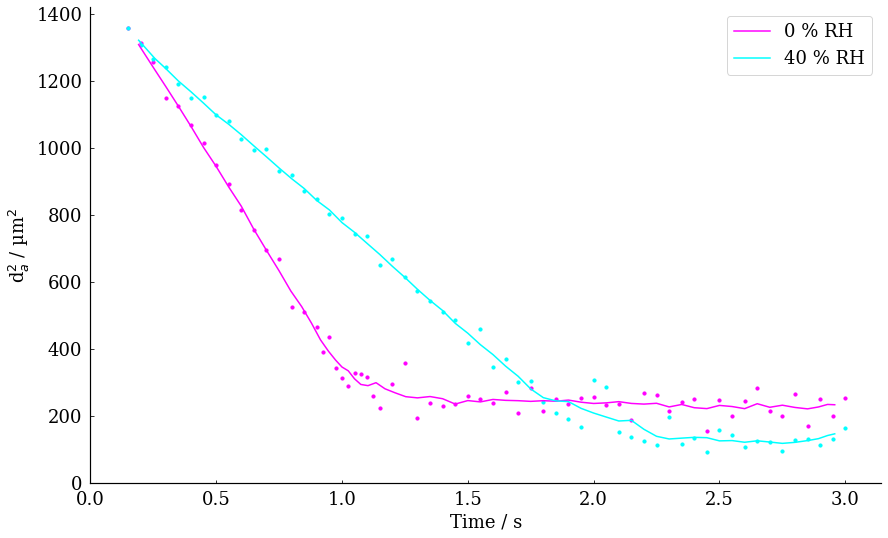

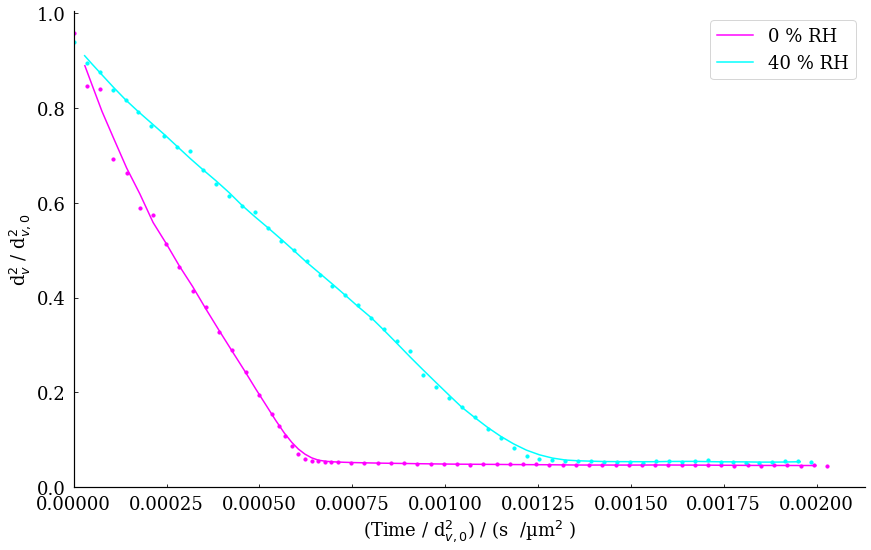

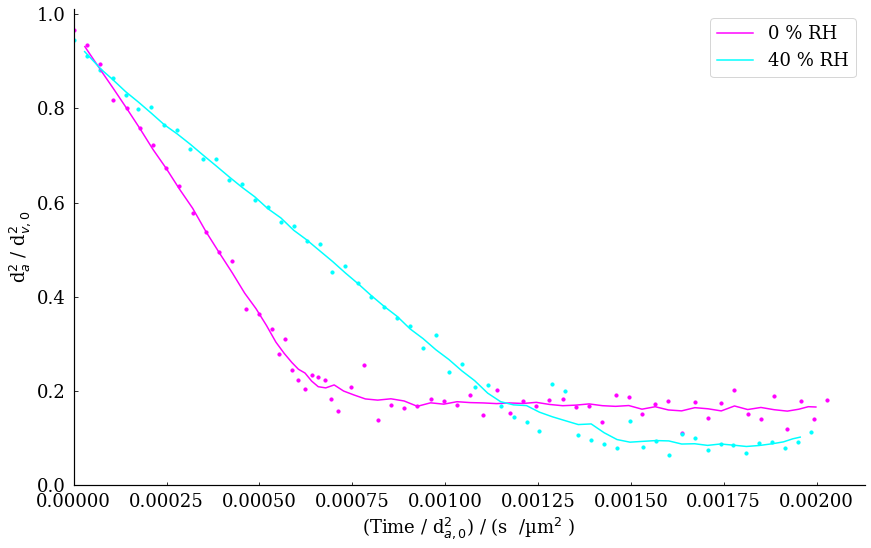

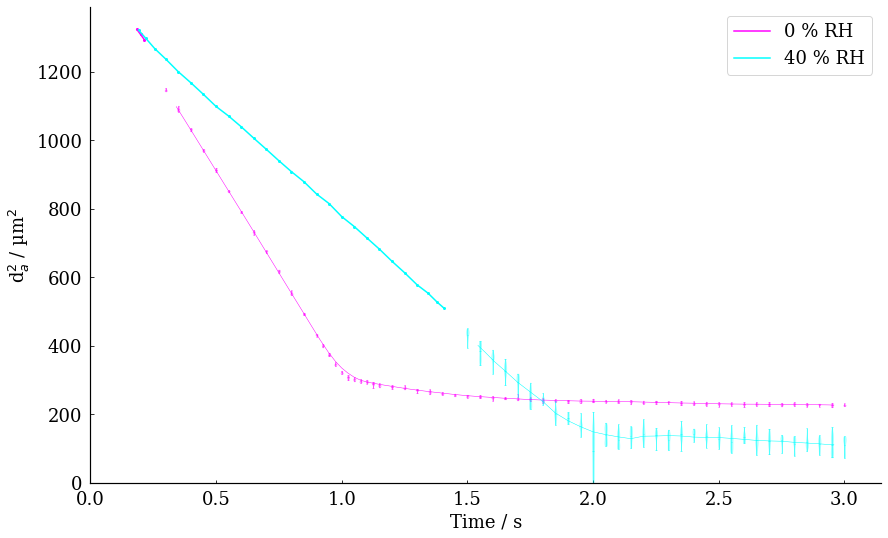

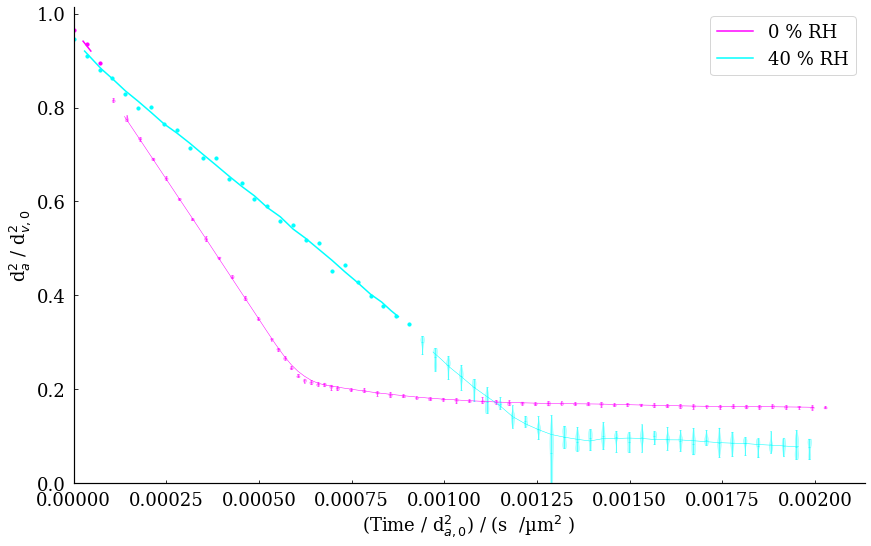

In [14]:
FDCA.plot_RH_comparison(results_list,
                        rh_list,
                        multi_list,
                        7,
                        'magenta',
                        'cyan')